IA Notebook - Descenso del gradiente

In [ ]:
# importar bibliotecas de operacion
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


$ F(x,y) = sin(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3 )*cos(2x + 1 + e^y)   $

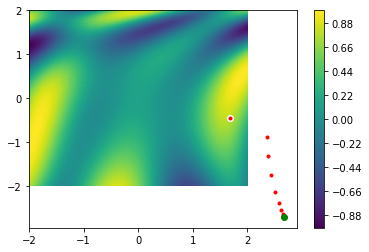

In [ ]:
# funcion de gradiente
func = lambda x,y: np.sin( (1/2)*x**2 - (1/4)*y**2 + 3 )*np.cos( 2*x + 1 - np.e ** y )

# 100 valores
res = 100 

# array de 100 valores desde -2 hasta 2
_x = np.linspace(-2,2, res)
# array de 100 valores desde -2 hasta 2
_y = np.linspace(-2,2, res)
# matriz para almacenar valores
_z = np.zeros((res,res)) 

# rellenar matriz z con la funcion gradiente
for ix, x in enumerate(_x):  #indice, valor
  for iy, y in enumerate(_y):
      _z[iy, ix] = func(x,y)

# ploteo con rellenado de colores
plt.contourf(_x, _y, _z,100)

# agregar barra de escala de colores
plt.colorbar()

# vector teta: generar un vector de valores aleatorios desde el rango -2 hasta 2
# (0,1) *4 => (0,4) - 2 => (-2,2) 
theta = np.random.rand(2)*4 - 2

# copiar array en nueva variable
_t = np.copy(theta) 

# incremento
h = 0.001 

# tasa de aprendizaje
lr = 0.01

# vector gradiente que permite actualizar parametros y minimizar funcion
grad = np.zeros(2)

# white circle: punto de partida
plt.plot(theta[0], theta[1], 'o', c='white')

for _ in range(1000): # itera todo lo del interior 1000 veces       
  for it, th in enumerate(theta):       

      # el primer componente no puede seguir con el incremento anterior. se resetea con el valor original     
      _t = np.copy(theta) 
      # incremento
      _t[it] = _t[it] + h 
      # derivada parcial
      deriv = ( func(_t[0],_t[1]) - func(theta[0], theta[1]) )/h
      grad[it] = deriv    

  # actualizando vector theta con el vector gradiente * tasa de aprendizaje
  theta = theta - lr*grad
  #print(func(theta[0], theta[1]))
  
  # dibuje cada 100 iteraciones
  if (_%100 == 0):      
     plt.plot(theta[0], theta[1], '.', c='red')  # red dot: puntos de recorrido

# green circle: punto de llegada
plt.plot(theta[0], theta[1], 'o', c='green') 

# mostrar plot
plt.show() 